# Tensorflow  Basics
<img src = "https://upload.wikimedia.org/wikipedia/commons/2/2d/Tensorflow_logo.svg" align = "center">


## Topics covered:
In this session we will learn about:
1. Tensorflow
2. Variables in Tensorflow
3. Tensorflow graph
4. Tensorflow Session
5. Tensorflow Optimizer
6. Tensorflow Keras
7. Tensorboard
8. Tensorflow estimators

## Importing dependencies

1. [Tensorflow](https://www.tensorflow.org/): Tensor operations
2. [Numpy](https://www.numpy.org/): Linear Algebra operations
3. [Matplotlib](https://matplotlib.org): Plotting
4. [OS](https://docs.python.org/3/library/os.html): Operating system functionality
5. [Pandas](https://pandas.pydata.org/): Data analysis
6. [tqdm](https://tqdm.github.io/): Generates progress bar

In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import os
import pandas as pd
from tqdm import tqdm_notebook
from tensorflow.keras.callbacks import TensorBoard
from sklearn import datasets

os.environ['CUDA_VISIBLE_DEVICES'] = "0"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "2"

%matplotlib inline

## Verifying import
print("Tensorflow version =",tf.__version__)

## Verifying whether tensorflow is using Graphic Processing Unit
print("Using GPU" if tf.test.is_built_with_cuda() else "Not using GPU")

Tensorflow version = 1.10.0
Using GPU


## Hello, Tensorflow!

In [3]:
message = tf.constant("Hello, Tensorflow")
sess = tf.Session()
print(sess.run(message).decode())
sess.close()

Hello, Tensorflow


## Creating Constant Scalars
**Reminder** <br/>
Scalars are tensors with rank 0<br/>
Vectors are tensors with rank 1<br/>
Scalars are tensors with rank 2<br/>
Constants are assigned value at declaration and value cannot be reassigned



In [9]:
## constant variables 0 dimensional
x = tf.constant(2.0)
y = tf.constant([3.0, 4.0])

## basic addition operation
z = x + y
m = x * y
## Run z and check value

## Creating and running a session
Computations are not run unless a tensorflow session is created <br/>
The graph is just static without a session<br/>
**Note: Do not forget to close session using tf.Session.close() to release hardware resources. <br/>
Failing to do so may lead to memory overflow**


In [10]:
## creating tensorflow session
sess = tf.Session()

## running the tensorflow session
print(sess.run([z, m])) ## returns the list of variables specified as a tuple

## closing session
sess.close()

[array([5., 6.], dtype=float32), array([6., 8.], dtype=float32)]


## Creating 1-D and 2-D tensor
It is also possible to convert numpy arrays and matrices to tensorflow tensors.<br/>
Which is demonstrated in the following example <br/>
In the following example a numpy function [np.eye](https://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html) is used, which returns an identity matrix

In [6]:
## tensorflow vector from list
z_arr = tf.constant([1,2,3,4])

## tensorflow matrix from nested list
z_mat = tf.constant([[1,0],[0,1]])

## tensosrflow vector from numpy vector
z_arr_np = tf.constant(np.array([1,2,3,4]))

## tensorflow vector from numpy matrix
z_mat_np = tf.constant(np.eye(2))

sess = tf.Session()

print("z_arr =", sess.run(z_arr))
print("z_mat =", sess.run(z_mat))
print("z_arr_np =", sess.run(z_arr_np))
print("z_mat_np =", sess.run(z_mat_np))

sess.close()

z_arr = [1 2 3 4]
z_mat = [[1 0]
 [0 1]]
z_arr_np = [1 2 3 4]
z_mat_np = [[1. 0.]
 [0. 1.]]


## Creating Variables
[Official tensorflow documentation for variables](https://www.tensorflow.org/api_docs/python/tf/Variable)

In [65]:
## creating a variable matrix of shape 2 x 4 and containing 32-bit float
W = tf.Variable(np.random.randn(2,4), dtype = tf.float32)

## Create a random uniform variable and print its value

## initialize object
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(W.eval())

[[-0.25378212 -1.3598912  -0.4662529  -0.2108367 ]
 [ 1.1364213   0.9597765   2.0502498   0.1253247 ]]


## Creating placeholders

Placeholders do not need to be specified value at declaration, but are later fed value through feed dictionary <br/>
At declaration, we need to specify shape and data type <br/>
Similar to numpy, tensorflow tensors also have shape attribute

In [18]:
placeholder1 = tf.placeholder(dtype = tf.float32, shape = [1,2,3,4])
print(placeholder1.shape)

## define a function to return length of a tensor

(1, 2, 3, 4)


## Using optimizer to minimize loss
Defining loss of a simple linear model <br/>
$$ y = mx + c $$

Creating an optimizer object and using it to minimimize the loss <br/>
In this we use [np.random.randn](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html) to generate variables

In [41]:
inp = np.linspace(1,50)
inp = np.reshape(inp, (50, 1))
print(inp.shape)
out = 12.123 * inp + 213.313 + 6 * np.random.randn(50, 1)
out.shape

(50, 1)


(50, 1)

##### plt.scatter(inp, out)
plt.xlabel("X")
plt.ylabel("y")
plt.title("input vs output")
plt.grid(True)

In [46]:
X = tf.placeholder(dtype = tf.float32, shape = [None, 1])
y = tf.placeholder(dtype = tf.float32, shape = [None, 1])
W = tf.Variable(np.random.randn(1), dtype = tf.float32, name = "weight")
b = tf.Variable(np.random.randn(1), dtype = tf.float32, name = "bias")

In [47]:

def getPrediction(W, X, b):
    '''
    Generates prediction from weight and input data
  
    Extended description of function. 
  
    Parameters: 
    W (tf.float32): Variable of shape (1)
    X (tf.float32): Placeholder of shape (None, 1)
    b (tf.flaot32): Variable of shape (1)
  
    Returns: 
    tf.float32 tensor: The predicted value
    
    '''
    return X*W + b

In [48]:
def loss(W, X, y, b):
    '''
    Generates loss from weight and input and output data
  
    Extended description of function. 
  
    Parameters: 
    W (tf.float32): Placeholder of shape (None, 1). The input data
    X (tf.float32): Variable of shape (1)
    b (tf.flaot32): Variable of shape (1)
    y (tf.float32): Placeholder of shape (None, 1). The output data (Different from predicted data)
  
    Returns: 
    tf.float32 tensor: Loss
    '''
    ## predicted values
    pred = getPrediction(W, X, b)
    
    return tf.losses.mean_squared_error(pred, y)

In [56]:
cost = loss(W, X, y, b)

## declaring optimizer and initializer for global variables
optimizer = tf.train.GradientDescentOptimizer(0.001).minimize(cost)
init = tf.global_variables_initializer()

## for holding weights
weights = {}

## loss at every 1000th iteration
costCache = []
wCache = []
bCache = []

Iteration:0, Loss = 298976.59375
Iteration:1000, Loss = 4159.173828125
Iteration:2000, Loss = 1595.7947998046875
Iteration:3000, Loss = 623.7470092773438
Iteration:4000, Loss = 255.1389617919922
Iteration:5000, Loss = 115.360595703125
Iteration:6000, Loss = 62.355594635009766
Iteration:7000, Loss = 42.255958557128906
Iteration:8000, Loss = 34.63385772705078
Iteration:9000, Loss = 31.743701934814453
Iteration:10000, Loss = 30.6477108001709
Iteration:11000, Loss = 30.232072830200195
Iteration:12000, Loss = 30.074546813964844
Iteration:13000, Loss = 30.014751434326172
Iteration:14000, Loss = 29.992074966430664
Iteration:15000, Loss = 29.983484268188477
Iteration:16000, Loss = 29.980234146118164
Iteration:17000, Loss = 29.979047775268555
Iteration:18000, Loss = 29.978559494018555
Iteration:19000, Loss = 29.978330612182617
CPU times: user 25.3 s, sys: 2.74 s, total: 28 s
Wall time: 17.1 s


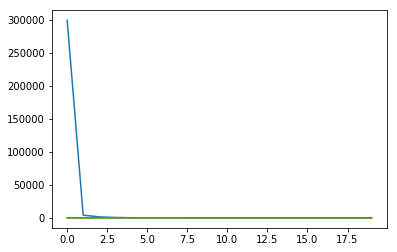

In [57]:
%%time

with tf.Session() as sess:
    ## initializing global variables
    sess.run(init)
    
    ## running for 20,000 iterations
    for num_iter in range(2*10**4):
        
        ## data fed through feed dictionary
        ## returns the optimizer and current cost
        _, currentCost, W_, b_ = sess.run([optimizer, cost, W, b], feed_dict = {X: inp, y: out})
        if num_iter % 10**3 == 0:
            costCache.append(currentCost)
            wCache.append(W_)
            bCache.append(b_)
            print("Iteration:{}, Loss = {}".format(num_iter, currentCost))
    ## storing weight and bias
    weights["weight"], weights["bias"] = W.eval(), b.eval()
    
    ## plot variation of cost
    plt.plot(costCache)

{'weight': array([12.224372], dtype=float32), 'bias': array([211.4551], dtype=float32)}


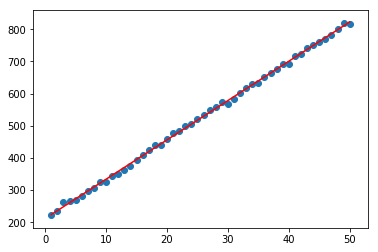

In [64]:
print(weights)
x = np.linspace(1, 50)
plt.plot(x, weights['weight'] * x + weights['bias'], color = 'r')
plt.scatter(inp, out)

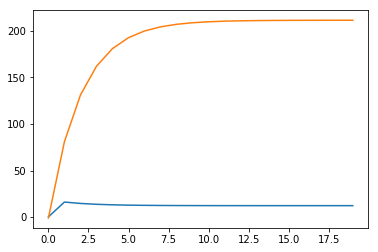

In [58]:
plt.plot(wCache)
plt.plot(bCache)

## tf.keras
Simple API for creating DL models.<br/>
Integrated into tensorflow <br/>
[Sample Code provided at Tensorflow documentation](https://www.tensorflow.org/tutorials)


In [ ]:
%%time
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)


## Tensorboard
A library for visualizing Deep Learning models <br/>
**Following code section is for users running on local machine**

In [ ]:
%%time
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

tensorboard = TensorBoard(log_dir="logs/{}".format("mnistmodel"))

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, callbacks=[tensorboard])
model.evaluate(x_test, y_test)

Run the following instructions in the shell

``
$ tensorboard --logdir=logs/
TensorBoard 1.10.0 at http://computationinator:6006 (Press CTRL+C to quit)
``
<br/> 
Enter the url in the web browser <br/>
Sample output is given below


<img src = "Images/boardgraph.png">
<img src = "Images/boardplot.png">
<img src = "Images/graph.png">

In [14]:
v1 = tf.get_variable("v1", shape=[3], initializer = tf.zeros_initializer)
v2 = tf.get_variable("v2", shape=[5], initializer = tf.zeros_initializer)

inc_v1 = v1.assign(v1+1)
dec_v2 = v2.assign(v2-1)

# Add an op to initialize the variables.
init_op = tf.global_variables_initializer()

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

# Later, launch the model, initialize the variables, do some work, and save the
# variables to disk.
with tf.Session() as sess:
    sess.run(init_op)
  # Do some work with the model.
    inc_v1.op.run()
    dec_v2.op.run()
  # Save the variables to disk.
    save_path = saver.save(sess, "temp/model.ckpt")
    print("Model saved in path: %s" % save_path)


ValueError: Variable v1 already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "<ipython-input-13-529839782065>", line 1, in <module>
    v1 = tf.get_variable("v1", shape=[3], initializer = tf.zeros_initializer)
  File "/home/vaibagga/anaconda3/envs/tensorflow/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/home/vaibagga/anaconda3/envs/tensorflow/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2901, in run_ast_nodes
    if self.run_code(code, result):


In [52]:
with tf.Session() as sess:
    print(sess.run(W))

FailedPreconditionError: Attempting to use uninitialized value weight_3
	 [[Node: weight_3/_0 = _Send[T=DT_FLOAT, client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_4_weight_3", _device="/job:localhost/replica:0/task:0/device:GPU:0"](weight_3)]]

<tf.Variable 'weight_3:0' shape=(1,) dtype=float32_ref>
